In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# My modules
from declination_smoothed import dec_smoothed_pos_max
from my_progs.catalog import read_icrfn
from my_progs.catalog.pos_diff import pos_diff_calc

Load the data from catalogs.

In [2]:
# Read ICRF3 S/X catalog
icrf3_sx = read_icrfn.read_icrf3(wv="sx")

icrf3_sx

<Table masked=True length=4536>
   icrf_name     iers_name type          ra         ... end_obs nb_sess nb_del
                                        deg         ...                       
     str16          str8   str1       float64       ... float64  int64  int64 
---------------- --------- ---- ------------------- ... ------- ------- ------
J000020.3-322101  2357-326   --       0.08499990025 ... 57776.0       4    237
J000027.0+030715  2357+028   -- 0.11259380737499998 ... 57974.7       1     28
J000053.0+405401  2358+406   -- 0.22117109666666665 ... 57809.9       3    152
J000105.3-155107  2358-161   -- 0.27220306162499996 ... 58137.6       4    316
J000107.0+605122  2358+605   --  0.2795825644583333 ... 57836.8       3    172
J000108.6+191433  2358+189   --  0.2859231923333333 ... 58205.8     168   3584
J000211.9-215309  2359-221   --  0.5499226089166666 ... 57901.9       3    103
J000315.9-194150  0000-199   --  0.8164558497083333 ... 58137.6       4    251
J000318.6-192722  0000-197   --  0.8278126181249998 ... 58137.6       5    296
             ...       ...  ...                 ... ...     ...     ...    ...
J235753.2-531113  2355-534    D  359.47194187566663 ... 58101.7     165   4895
J235809.8+492143  2355+490   --   359.5408896171249 ... 57840.3       2    174
J235810.8-102008  2355-106    D   359.5453433192499 ... 58204.3     768  24542
J235816.9-285334  2355-291   --   359.5707148113749 ... 57771.0       3    137
J235828.8+043024  2355+042   --  359.62019570283326 ... 57840.3       4    260
J235846.0+195520  2356+196   --   359.6920212854583 ... 57875.7       5    388
J235859.8+392228  2356+390   --   359.7493965439166 ... 57809.9       3    230
J235931.8-063943  2356-069   --     359.88256707925 ... 58048.6       5    195
J235933.1+385042  2356+385    D   359.8882533119583 ... 58204.3    1272  26649
J235935.4-313343  2357-318   --    359.897881414125 ... 58204.3     235   4692

In [3]:
# Read ICRF3 K catalog
icrf3_k = read_icrfn.read_icrf3(wv="k")

icrf3_k

<Table masked=True length=824>
   icrf_name     iers_name type         ra         ... end_obs nb_sess nb_del
                                       deg         ...                       
     str16          str8   str1      float64       ... float64  int64  int64 
---------------- --------- ---- ------------------ ... ------- ------- ------
J000435.6-473619  0002-478    D 1.1485647359583333 ... 58067.8       7     13
J000504.3+542824  0002+541   -- 1.2681805876666665 ... 58181.5       9    732
J000557.1+382015  0003+380   -- 1.4882307991666666 ... 58195.8      10    724
J000613.8-062335  0003-066   -- 1.5578870084583334 ... 58181.5       9    658
J000903.9+062821  0006+061   -- 2.2663827199999997 ... 58195.8       7    316
J001031.0+105829  0007+106    D 2.6291912593749993 ... 58244.2      12   1043
J001101.2-261233  0008-264   -- 2.7551947386666664 ... 58070.2       9    298
J001135.2+082355  0009+081   -- 2.8969566952083325 ... 58082.4      10    579
J001259.9-395426  0010-401   -- 3.2496242605416663 ... 58195.8      13    279
             ...       ...  ...                ... ...     ...     ...    ...
J234719.8-511036  2344-514   --      356.832767235 ... 58070.1       9     16
J234831.7+062459  2345+061   -- 357.13237777741665 ... 58244.2       9    627
J234920.8+384917  2346+385   -- 357.33677722204163 ... 58244.2      13    842
J235421.6+455304  2351+456   --  358.5903343513333 ... 58244.2      16    990
J235430.1-151311  2351-154   --  358.6258132440416 ... 58244.2      11    544
J235622.7+815252  2353+816    D  359.0949744500416 ... 58148.3      14   1587
J235725.1-015215  2354-021   -- 359.35474141924993 ... 58181.5       7    533
J235753.2-531113  2355-534    D   359.471941998375 ... 58236.3      13     34
J235810.8-102008  2355-106    D  359.5453432924583 ... 58114.4       6    436
J235935.4-313343  2357-318   --  359.8978815327083 ... 58244.2      10    137

In [4]:
# Read ICRF3 X/Ka catalog
icrf3_xka = read_icrfn.read_icrf3(wv="xka")

icrf3_xka

<Table masked=True length=678>
   icrf_name     iers_name type         ra         ... end_obs nb_sess nb_del
                                       deg         ...                       
     str16          str8   str1      float64       ... float64  int64  int64 
---------------- --------- ---- ------------------ ... ------- ------- ------
J000435.6-473619  0002-478    D 1.1485644423333332 ... 58027.3      23     30
J000504.3+542824  0002+541   --  1.268180768958333 ... 58146.7      27     54
J000557.1+382015  0003+380   --     1.488230883375 ... 58146.9      88    126
J000613.8-062335  0003-066   -- 1.5578869827083333 ... 58146.8      92    137
J000903.9+062821  0006+061   --  2.266382655708333 ... 58146.8      77    110
J001031.0+105829  0007+106    D  2.629191267708333 ... 58146.9     113    179
J001101.2-261233  0008-264   --  2.755194709333333 ... 58111.2      66    114
J001135.2+082355  0009+081   -- 2.8969566850833326 ... 58146.9      67     95
J001259.9-395426  0010-401   --     3.249624211875 ... 58112.1      54     96
             ...       ...  ...                ... ...     ...     ...    ...
J234831.7+062459  2345+061   --    357.13237776175 ... 58146.9      25     30
J234920.8+384917  2346+385   --  357.3367773387916 ... 58146.9     115    165
J234925.4-493226  2346-498   -- 357.35574538891666 ... 57851.4      10     15
J235421.6+455304  2351+456   --  358.5903344727916 ... 58146.7      74    114
J235430.1-151311  2351-154   --  358.6258131907499 ... 58146.8      88    129
J235622.7+815252  2353+816    D  359.0949748757083 ... 58146.8      63    193
J235725.1-015215  2354-021   --  359.3547413984583 ... 58146.9      54     68
J235753.2-531113  2355-534    D  359.4719418045416 ... 57851.3      14     24
J235810.8-102008  2355-106    D  359.5453432586666 ... 58146.8     116    172
J235935.4-313343  2357-318   -- 359.89788137791663 ... 58112.1      62     98

In [5]:
# Read ICRF1 catalog
icrf1 = read_icrfn.read_icrf1()

icrf1

<Table masked=True length=608>
   icrf_name     iers_name type         ra         ...  end_obs  nb_sess nb_del
                                       deg         ...                         
     str16          str8   str1      float64       ...  float64   int64  int64 
---------------- --------- ---- ------------------ ... --------- ------- ------
J000435.6-473619  0002-478    C 1.1485649833333333 ... 2449525.2       3      7
J000557.1+382015  0003+380    D  1.488230870833333 ... 2449555.3       2     41
J000613.8-062335  0003-066    C 1.5578870291666664 ... 2449566.4      41    114
J001031.0+105829  0007+106    D 2.6291911999999997 ... 2449690.5      10     74
J001033.9+172418  0007+171    D 2.6416275791666664 ... 2449663.3      19     57
J001052.5-415310  0008-421    C       2.7188318375 ... 2449331.0       2      6
J001101.2-261233  0008-264    C 2.7551947999999995 ... 2449791.2       7     38
J001331.1+405137  0010+405    D  3.379709220833333 ... 2449821.0       7    219
J001611.0-001512  0013-005    C  4.046202312499999 ... 2449612.4      27    116
             ...       ...  ...                ... ...       ...     ...    ...
J234029.0+264156  2337+264    O 355.12095612916664 ... 2449849.3      10    363
J234636.8+093045  2344+092    C 356.65349399999997 ... 2449668.4      25    122
J234802.6-163112  2345-167    O  357.0108688208333 ... 2449663.3     153    849
J235421.6+455304  2351+456    O  358.5903344791666 ... 2449663.3      29    172
J235430.1-151311  2351-154    C  358.6258132749999 ... 2449695.3      31     62
J235509.4+495008  2352+495    O 358.78940901666664 ... 2449660.3      14    140
J235600.6-682003  2353-686    C  359.0028394083333 ... 2448757.9       3     17
J235753.2-531113  2355-534    C  359.4719421791666 ... 2449791.2      18     81
J235810.8-102008  2355-106    C  359.5453433916666 ... 2449884.3     134    616
J235933.1+385042  2356+385    C 359.88825323749995 ... 2449520.3       1      4

In [6]:
# Read ICRF2 catalog
icrf2 = read_icrfn.read_icrf2()

icrf2

<Table length=3414>
   icrf_name     ivs_name iers_name ... end_obs nb_sess nb_del
                                    ...                       
     str16         str8      str8   ... float64  int64  int64 
---------------- -------- --------- ... ------- ------- ------
J000020.3-322101 2357-326  2357-326 ... 52306.7       1     40
J000053.0+405401 2358+406  2358+406 ... 50242.8       1     22
J000105.3-155107 2358-161  2358-161 ... 50632.3       1     58
J000107.0+605122 2358+605  2358+605 ... 52306.7       1     11
J000108.6+191433 2358+189  2358+189 ... 54907.7      21    716
J000211.9-215309 2359-221  2359-221 ... 54818.7       1      3
J000315.9-194150 0000-199  0000-199 ... 54088.1       1     11
J000318.6-192722 0000-197  0000-197 ... 50688.3       2     76
J000319.3+212944 0000+212  0000+212 ... 50156.3       2     66
             ...      ...       ... ...     ...     ...    ...
J235723.8-245103 2354-251  2354-251 ... 53561.9       1     26
J235725.1-015215 2354-021  2354-021 ... 50576.2       1     89
J235731.1-112539 2354-117  2354-117 ... 50576.2       1     86
J235753.2-531113 2355-534  2355-534 ... 54706.7      40    181
J235810.8-102008 2355-106  2355-106 ... 54893.7     196   2707
J235828.8+043024 2355+042  2355+042 ... 53573.0       1     51
J235846.0+195520 2356+196  2356+196 ... 54482.7       3    177
J235859.8+392228 2356+390  2356+390 ... 50242.8       1     72
J235933.1+385042 2356+385  2356+385 ... 54907.7     813  10501
J235935.4-313343 2357-318  2357-318 ... 54872.7       9    257

# Positional difference between ICRF3 SX and K.
- Crossmatch between ICRF3 K and SX.
- Calculate the positional difference.

In [7]:
# Crossmatch.
sx_k_com = join(icrf3_sx, icrf3_k, keys="icrf_name", table_names=["sx", "k"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    sx_k_com["ra_k"], sx_k_com["ra_err_k"], sx_k_com["dec_k"], sx_k_com["dec_err_k"], sx_k_com["ra_dec_corr_k"],
    sx_k_com["ra_sx"], sx_k_com["ra_err_sx"], sx_k_com["dec_sx"], sx_k_com["dec_err_sx"], sx_k_com["ra_dec_corr_sx"])

sx_k_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

sx_k_com["dra"].unit = u.mas
sx_k_com["ddec"].unit = u.mas
sx_k_com["dra_err"].unit = u.mas
sx_k_com["ddec_err"].unit = u.mas
sx_k_com["dra_ddec_cov"].unit = u.mas * u.mas
sx_k_com

<Table masked=True length=793>
   icrf_name     iers_name_sx type_sx ...     nor_sep_cov          nor_sep      
                                      ...         deg                deg        
     str16           str8       str1  ...       float64            float64      
---------------- ------------ ------- ... ------------------- ------------------
J000435.6-473619     0002-478       D ...   1.188197792634294 1.2363878950506229
J000504.3+542824     0002+541      -- ...   0.570766021761459 0.5601494820910352
J000557.1+382015     0003+380      -- ...  0.8985118393643539 0.8475402383457167
J000613.8-062335     0003-066      -- ...   4.187109670844749  3.561938366000046
J000903.9+062821     0006+061      -- ...  1.6869373615767118 1.8086291643765664
J001031.0+105829     0007+106       D ...  0.8634038326324606 0.9465784648309358
J001101.2-261233     0008-264      -- ...  1.3272867837539675 1.2410673213606251
J001135.2+082355     0009+081      -- ...  1.1379891608036476 1.2136784689445992
J001259.9-395426     0010-401      -- ...  2.4670233483872845  2.468980212600583
             ...          ...     ... ...                 ...                ...
J234719.8-511036     2344-514      -- ...  1.1326942032358946  1.389236693263397
J234831.7+062459     2345+061      -- ... 0.31007667713216086 0.3305143536441243
J234920.8+384917     2346+385      -- ...  1.4276261050734633 1.3411716555013442
J235421.6+455304     2351+456      -- ...  2.8000288401253473  2.659109155225099
J235430.1-151311     2351-154      -- ...  1.6639817378996609 1.5220305805919871
J235622.7+815252     2353+816       D ...  1.6681494760028974 1.6795478007905258
J235725.1-015215     2354-021      -- ...  1.6136299900714346  1.698102040774554
J235753.2-531113     2355-534       D ...  1.5777219545726495 1.5626991395507046
J235810.8-102008     2355-106       D ...  1.5899278810034219 1.9071045120766026
J235935.4-313343     2357-318      -- ...  1.5636750970050717 1.5775622736192554

# Positional difference between ICRF3 SX and XKa
- Crossmatch between ICRF3 XKa and SX.
- Calculate the positional difference.

In [8]:
# Crossmatch.
sx_xka_com = join(icrf3_sx, icrf3_xka, keys="icrf_name", table_names=["sx", "xka"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    sx_xka_com["ra_xka"], sx_xka_com["ra_err_xka"], sx_xka_com["dec_xka"], sx_xka_com["dec_err_xka"], sx_xka_com["ra_dec_corr_xka"],
    sx_xka_com["ra_sx"], sx_xka_com["ra_err_sx"], sx_xka_com["dec_sx"], sx_xka_com["dec_err_sx"], sx_xka_com["ra_dec_corr_sx"])

sx_xka_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

sx_xka_com["dra"].unit = u.mas
sx_xka_com["ddec"].unit = u.mas
sx_xka_com["dra_err"].unit = u.mas
sx_xka_com["ddec_err"].unit = u.mas
sx_xka_com["dra_ddec_cov"].unit = u.mas * u.mas
sx_xka_com

<Table masked=True length=638>
   icrf_name     iers_name_sx ...     nor_sep_cov           nor_sep      
                              ...         deg                 deg        
     str16           str8     ...       float64             float64      
---------------- ------------ ... ------------------- -------------------
J000435.6-473619     0002-478 ...   4.601760261720644   4.126150752708831
J000504.3+542824     0002+541 ...   3.308600763295897  3.2163889030414756
J000557.1+382015     0003+380 ...  4.1107399707139765   4.498275057885697
J000613.8-062335     0003-066 ...  1.9687430995597857   2.359673994315475
J000903.9+062821     0006+061 ...   1.513685975710927  1.4196268208525764
J001031.0+105829     0007+106 ... 0.04585371416701023  0.0520605930629916
J001101.2-261233     0008-264 ...   4.465425018224918  2.8789428215871418
J001135.2+082355     0009+081 ...  1.6526084066642648   1.321557106862532
J001259.9-395426     0010-401 ...   2.011233846345586  2.0557301939369443
             ...          ... ...                 ...                 ...
J234743.6-494627     2345-500 ...  1.3796096825245925  1.2414374145063274
J234831.7+062459     2345+061 ...  0.1445004940191554 0.11765654245891821
J234920.8+384917     2346+385 ...   3.222647267166238  3.4757883224046155
J235421.6+455304     2351+456 ...   6.600335433686747   6.700358473553162
J235430.1-151311     2351-154 ...  3.6880505696879804  2.7250451192845113
J235622.7+815252     2353+816 ...   2.661483334657453   2.597415150094894
J235725.1-015215     2354-021 ...  2.4801842841371005   2.429303869914691
J235753.2-531113     2355-534 ...  1.2662290505258584  1.2412696854603054
J235810.8-102008     2355-106 ...   4.895296314142147  3.9152579022402394
J235935.4-313343     2357-318 ...   2.374209280258972  1.3934798378217006

# Positional difference between ICRF3 SX and ICRF2.
- Crossmatch between ICRF3 SX and ICRF2.
- Calculate the positional difference.

In [9]:
# Crossmatch.
sx_icrf2_com = join(icrf3_sx, icrf2, keys="icrf_name", table_names=["sx", "icrf2"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    sx_icrf2_com["ra_icrf2"], sx_icrf2_com["ra_err_icrf2"], sx_icrf2_com["dec_icrf2"], sx_icrf2_com["dec_err_icrf2"], sx_icrf2_com["ra_dec_corr_icrf2"],
    sx_icrf2_com["ra_sx"], sx_icrf2_com["ra_err_sx"], sx_icrf2_com["dec_sx"], sx_icrf2_com["dec_err_sx"], sx_icrf2_com["ra_dec_corr_sx"])

sx_icrf2_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

sx_icrf2_com["dra"].unit = u.mas
sx_icrf2_com["ddec"].unit = u.mas
sx_icrf2_com["dra_err"].unit = u.mas
sx_icrf2_com["ddec_err"].unit = u.mas
sx_icrf2_com["dra_ddec_cov"].unit = u.mas * u.mas
sx_icrf2_com

<Table masked=True length=3410>
   icrf_name     iers_name_sx type_sx ...    nor_sep_cov           nor_sep      
                                      ...        deg                 deg        
     str16           str8       str1  ...      float64             float64      
---------------- ------------ ------- ... ------------------ -------------------
J000020.3-322101     2357-326      -- ... 0.8609259257975941  0.8626187547245516
J000053.0+405401     2358+406      -- ...  8.090510757848886   8.483175218932251
J000105.3-155107     2358-161      -- ... 1.0485423433968737  1.3583951570627866
J000107.0+605122     2358+605      -- ... 1.4700835353031265  1.5249691004619967
J000108.6+191433     2358+189      -- ... 0.2619708291515122  0.2682616694431646
J000211.9-215309     2359-221      -- ...  1.451640927334107  1.2894317819540022
J000315.9-194150     0000-199      -- ... 0.2952717153251521 0.37730026802147903
J000318.6-192722     0000-197      -- ... 0.8481686743015533  0.8530590722014979
J000319.3+212944     0000+212      -- ... 0.7554647074256818  0.9131799742375104
             ...          ...     ... ...                ...                 ...
J235723.8-245103     2354-251      -- ... 0.1527832031889333 0.18170560577021388
J235725.1-015215     2354-021      -- ...  1.700034581820504   1.725261507770384
J235731.1-112539     2354-117      -- ... 1.7993275691474417  1.8108863986730273
J235753.2-531113     2355-534       D ... 2.4866762205535986   2.597107895884173
J235810.8-102008     2355-106       D ...  3.412582426554584  3.2211748334983157
J235828.8+043024     2355+042      -- ...  0.857916519520214  0.9962298618548524
J235846.0+195520     2356+196      -- ...  1.608631620529428  1.4017906675985443
J235859.8+392228     2356+390      -- ... 0.5128533565317482  0.5069978484791311
J235933.1+385042     2356+385       D ... 0.6710800295675498  0.6559727867155829
J235935.4-313343     2357-318      -- ...  1.632026876389826  1.6446860289181746

# Positional difference between ICRF3 SX and ICRF1.
- Crossmatch between ICRF3 SX and ICRF1.
- Calculate the positional difference.

In [10]:
icrf1["ra_dec_corr"] = icrf1["ra_dec_corr"].filled(0)

# Crossmatch.
sx_icrf1_com = join(icrf3_sx, icrf1, keys="icrf_name", table_names=["sx", "icrf1"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    sx_icrf1_com["ra_icrf1"], sx_icrf1_com["ra_err_icrf1"], sx_icrf1_com["dec_icrf1"], sx_icrf1_com["dec_err_icrf1"], sx_icrf1_com["ra_dec_corr_icrf1"],
    sx_icrf1_com["ra_sx"], sx_icrf1_com["ra_err_sx"], sx_icrf1_com["dec_sx"], sx_icrf1_com["dec_err_sx"], sx_icrf1_com["ra_dec_corr_sx"])

sx_icrf1_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

sx_icrf1_com["dra"].unit = u.mas
sx_icrf1_com["ddec"].unit = u.mas
sx_icrf1_com["dra_err"].unit = u.mas
sx_icrf1_com["ddec_err"].unit = u.mas
sx_icrf1_com["dra_ddec_cov"].unit = u.mas * u.mas
sx_icrf1_com

<Table masked=True length=602>
   icrf_name     iers_name_sx ...     nor_sep_cov           nor_sep      
                              ...         deg                 deg        
     str16           str8     ...       float64             float64      
---------------- ------------ ... ------------------- -------------------
J000435.6-473619     0002-478 ...   1.460851189907218  1.4696355614313206
J000557.1+382015     0003+380 ...  0.9193454459163318  0.9371556029799343
J000613.8-062335     0003-066 ...  1.8938616483998083  1.4933213503548635
J001031.0+105829     0007+106 ...  0.5026921979253373  0.5665482333437921
J001033.9+172418     0007+171 ...  0.2093448096426579  0.2448334664871616
J001052.5-415310     0008-421 ...   3.243707746367277  3.4074752501118923
J001101.2-261233     0008-264 ...   1.039817769882776  0.8011739277738092
J001331.1+405137     0010+405 ...  0.5598793421494791  0.5667470593332399
J001611.0-001512     0013-005 ...  0.5097571392167355 0.29715988605496535
             ...          ... ...                 ...                 ...
J234029.0+264156     2337+264 ...  0.3314603706627368   0.331460322361075
J234636.8+093045     2344+092 ...   1.049025213823631  0.8995492881779265
J234802.6-163112     2345-167 ... 0.20432837524889302 0.20432588204481547
J235421.6+455304     2351+456 ...  0.5315292773986077  0.5315308412775651
J235430.1-151311     2351-154 ...  0.2197086204234369 0.14492158648704043
J235509.4+495008     2352+495 ...  0.2618624970782462 0.26183954676508114
J235600.6-682003     2353-686 ...  0.8397627636500761  0.8357982698058591
J235753.2-531113     2355-534 ...  1.8127397670543528  1.8473502503569506
J235810.8-102008     2355-106 ...   1.138847468681842  1.0194512381206922
J235933.1+385042     2356+385 ... 0.35867577352121927 0.30399162364040927

In [14]:
# Smooth the positional difference of catalogs
bin_size = 50

# ICRF1 wrt. ICRF3(SX)
dec_icrf1, dra_icrf1 = dec_smoothed_pos_max(
    sx_icrf1_com["dec_sx"].filled(), sx_icrf1_com["dra"].filled(), bin_size)
dec_icrf1, ddec_icrf1 = dec_smoothed_pos_max(
    sx_icrf1_com["dec_sx"].filled(), sx_icrf1_com["ddec"].filled(), bin_size)
dec_icrf1, ang_sep_icrf1 = dec_smoothed_pos_max(
    sx_icrf1_com["dec_sx"].filled(), sx_icrf1_com["ang_sep"].filled(), bin_size)

# ICRF2 wrt. ICRF3(SX)
dec_icrf2, dra_icrf2 = dec_smoothed_pos_max(
    sx_icrf2_com["dec_sx"], sx_icrf2_com["dra"], bin_size)
dec_icrf2, ddec_icrf2 = dec_smoothed_pos_max(
    sx_icrf2_com["dec_sx"], sx_icrf2_com["ddec"], bin_size)
dec_icrf2, ang_sep_icrf2 = dec_smoothed_pos_max(
    sx_icrf2_com["dec_sx"], sx_icrf2_com["ang_sep"], bin_size)

# ICRF3(K) wrt. ICRF3(SX)
dec_k, dra_k = dec_smoothed_pos_max(
    sx_k_com["dec_sx"].filled(), sx_k_com["dra"].filled(), bin_size)
dec_k, ddec_k = dec_smoothed_pos_max(
    sx_k_com["dec_sx"].filled(), sx_k_com["ddec"].filled(), bin_size)
dec_k, ang_sep_k = dec_smoothed_pos_max(
    sx_k_com["dec_sx"].filled(), sx_k_com["ang_sep"].filled(), bin_size)

# ICRF3(XKa) wrt. ICRF3(SX)
dec_xka, dra_xka = dec_smoothed_pos_max(
    sx_xka_com["dec_sx"].filled(), sx_xka_com["dra"].filled(), bin_size)
dec_xka, ddec_xka = dec_smoothed_pos_max(
    sx_xka_com["dec_sx"].filled(), sx_xka_com["ddec"].filled(), bin_size)
dec_xka, ang_sep_xka = dec_smoothed_pos_max(
    sx_xka_com["dec_sx"].filled(), sx_xka_com["ang_sep"].filled(), bin_size)


# Plot the positional difference as a function of the declination
- dra vs. dec.
- ddec vs. dec.
- angular separation vs. dec

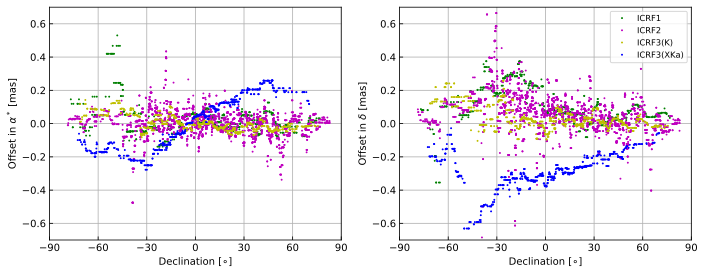

In [12]:
# Plot the smoothed positional formal error
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, figsize=(10, 4))

ax0.plot(dec_icrf1, dra_icrf1, "g.", ms=2, label="ICRF1")
ax0.plot(dec_icrf2, dra_icrf2, "m.", ms=2, label="ICRF2")
ax0.plot(dec_k, dra_k, "y.", ms=2, label="ICRF3(K)")
ax0.plot(dec_xka, dra_xka, "b.", ms=2, label="ICRF3(XKa)")

ax0.set_xlim([-90, 90])
ax0.set_ylim([-0.7, 0.7])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_xlabel("Declination [$\circ$]")
# ax0.set_yscale("log")
ax0.set_ylabel("Offset in $\\alpha^*$ [mas]")
ax0.grid()  
# ax0.legend(fontsize="small")

ax1.plot(dec_icrf1, ddec_icrf1, "g.", ms=2, label="ICRF1")
ax1.plot(dec_icrf2, ddec_icrf2, "m.", ms=2, label="ICRF2")
ax1.plot(dec_k, ddec_k, "y.", ms=2, label="ICRF3(K)")
ax1.plot(dec_xka, ddec_xka, "b.", ms=2, label="ICRF3(XKa)")

ax1.set_ylim([-0.7, 0.7])
ax1.set_xlabel("Declination [$\circ$]")
# ax1.set_yscale("log")
ax1.set_ylabel("Offset in $\delta$ [mas]")
ax1.grid()  
ax1.legend(fontsize="small")

fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig("../plots/icrf_offset_vs_decl.png")

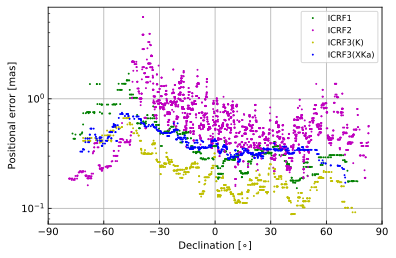

In [13]:
# Plot the smoothed positional formal error
fig, ax = plt.subplots()

ax.plot(dec_icrf1, ang_sep_icrf1, "g.", ms=2, label="ICRF1")
ax.plot(dec_icrf2, ang_sep_icrf2, "m.", ms=2, label="ICRF2")
# ax.plot(dec_sx, ang_sep_sx, "r.", ms=2, label="ICRF3(SX)")
ax.plot(dec_k, ang_sep_k, "y.", ms=2, label="ICRF3(K)")
ax.plot(dec_xka, ang_sep_xka, "b.", ms=2, label="ICRF3(XKa)")
# ax.plot(dec_gdr2, ang_sep_gdr2, "k.", ms=2, label="Gaia DR2")

ax.set_xlim([-90, 90])
ax.set_xticks(np.arange(-90, 91, 30))
ax.set_xlabel("Declination [$\circ$]")
ax.set_yscale("log")
ax.set_ylabel("Positional error [mas]")
ax.grid()  
ax.legend(fontsize="small")

plt.savefig("../plots/icrf_ang_sep.png")